# Social Network Analysis with NetworkX - Part 4
## Graphing Billy Corgan's Community

### 1. Create a NetworkX Graph

First, import NetworkX and Matplotlib. create a NetworkX graph and assign it to `G`.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

### 2. Create a Community

Next, we create the lists of bands and combine them into a community

In [2]:
# Define each band
smashing_pumpkins = ['Billy Corgan', 
                     'James Iha', 
                     'Jimmy Chamberlin', 
                     'Katie Cole', 
                     "D'arcy Wretzky",
                     'Melissa Auf der Maur', 
                     'Ginger Pooley', 
                     'Mike Byrne', 
                     'Nicole Fiorentino']

zwan = ['Billy Corgan', 
        'Jimmy Chamberlin', 
        'Paz Lenchantin', 
        'David Pajo', 
        'Matt Sweeney']

tool = ["Maynard James Keenan", 
        "Adam Jones", 
        "Danny Carey", 
        "Justin Chancellor"]

a_perfect_circle = ["Maynard James Keenan", 
                    "Billy Howerdel", 
                    "James Iha", 
                    "Matt McJunkins", 
                    "Jeff Friedl",
                    "Troy Van Leeuwen",
                    "Paz Lenchantin",
                    "Tim Alexander",
                    "Josh Freese",
                    "Danny Lohner",
                    "Jeordie White"]

# Combine the band into communities
communities = [smashing_pumpkins, zwan, tool, a_perfect_circle]

### 3. Create nodes and edges
First, we defined the nodes and edges based on the lists of band members. Then, we then define the communities as separate lists of nodes. Next, we will loop over each community (band) and add nodes and edges to graph for each.

In [3]:
# Add nodes and edges to the graph
for community in communities:
    G.add_nodes_from(community)
    G.add_edges_from([(node1, node2) for node1 in community for node2 in community if node1 != node2])

### 4. Calculate Centrality Measures

In [4]:
import pandas as pd

# Calculate betweenness, degree, and closeness centrality
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Stash the values in dataframes
bc_data = pd.DataFrame.from_dict(betweenness_centrality, 
                             columns=["BetweennessCentrality"], 
                             orient="index")

dc_data = pd.DataFrame.from_dict(degree_centrality, 
                             columns=["DegreeCentrality"], 
                             orient="index")

cc_data = pd.DataFrame.from_dict(closeness_centrality, 
                             columns=["ClosenessCentrality"], 
                             orient="index")

centrality_data = pd.concat([bc_data, dc_data, cc_data], axis=1)

display(centrality_data)

,BetweennessCentrality,DegreeCentrality,ClosenessCentrality
Billy Corgan,0.034256,0.478261,0.605263
James Iha,0.339921,0.782609,0.821429
Jimmy Chamberlin,0.034256,0.478261,0.605263
Katie Cole,0.000000,0.347826,0.560976
D'arcy Wretzky,0.000000,0.347826,0.560976
Melissa Auf der Maur,0.000000,0.347826,0.560976
Ginger Pooley,0.000000,0.347826,0.560976
Mike Byrne,0.000000,0.347826,0.560976
Nicole Fiorentino,0.000000,0.347826,0.560976
Paz Lenchantin,0.144928,0.608696,0.718750


### 4. Create a Flat List of Communities

In [5]:
flat_communities = [node for community in communities for node in community]

# sanity check
print(flat_communities)

['Billy Corgan', 'James Iha', 'Jimmy Chamberlin', 'Katie Cole', "D'arcy Wretzky", 'Melissa Auf der Maur', 'Ginger Pooley', 'Mike Byrne', 'Nicole Fiorentino', 'Billy Corgan', 'Jimmy Chamberlin', 'Paz Lenchantin', 'David Pajo', 'Matt Sweeney', 'Maynard James Keenan', 'Adam Jones', 'Danny Carey', 'Justin Chancellor', 'Maynard James Keenan', 'Billy Howerdel', 'James Iha', 'Matt McJunkins', 'Jeff Friedl', 'Troy Van Leeuwen', 'Paz Lenchantin', 'Tim Alexander', 'Josh Freese', 'Danny Lohner', 'Jeordie White']


### 5. Assign a color for the nodes of each community

In [6]:
import matplotlib.pyplot as plt

# Define the custom color palette
color_palette = {
    'Smashing-Pumpkins': 'steelblue',
    'Zwan': 'skyblue',
    'A-Perfect-Circle': 'darkorange',
    'Tool': 'gold',
    'Other': 'crimson',
}

In [7]:
# Define the node colors
node_colors = []

for node in G.nodes:
    if flat_communities.count(node) > 1:
        node_colors.append(color_palette['Other'])
    elif node in smashing_pumpkins:
        node_colors.append(color_palette['Smashing-Pumpkins'])
    elif node in zwan:
        node_colors.append(color_palette['Zwan'])
    elif node in tool:
        node_colors.append(color_palette['Tool'])
    elif node in a_perfect_circle:
        node_colors.append(color_palette['A-Perfect-Circle'])

### 6. Plot the Figure

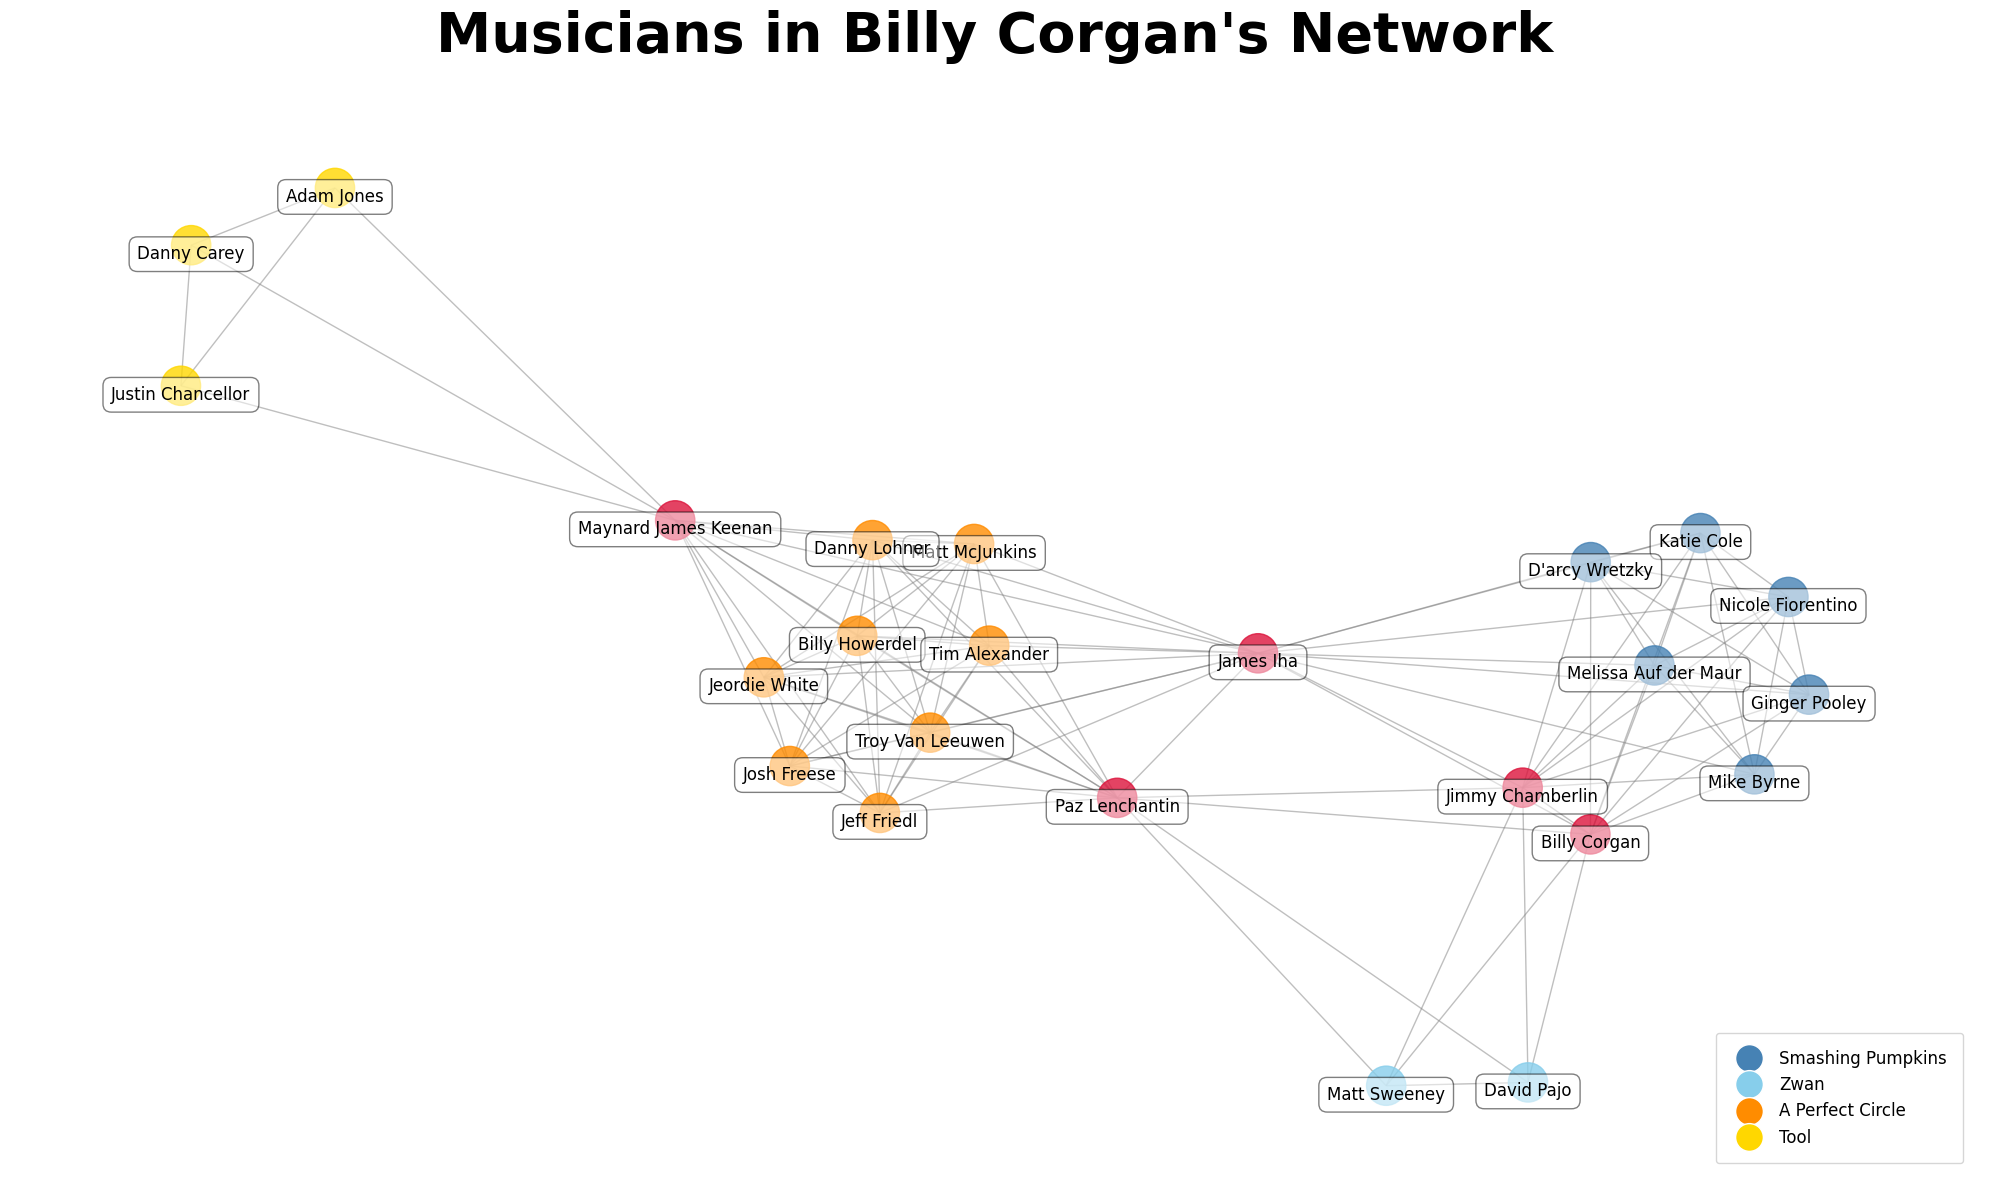

In [8]:
# Establish figure size
plt.figure(figsize=(20, 12))

# Calculate the node positions
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Prepare Node Labels
# node_labels = nx.get_node_attributes(G, 'label')

bbox_props = {
    'boxstyle': 'round',
    'facecolor': 'white',
    'edgecolor': 'black',
    'linewidth': 1,
    'pad': 0.5,
    'alpha': 0.5,
}

# # Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', verticalalignment='top', bbox=bbox_props)
# nx.draw_networkx_labels(G, pos, labels=node_labels, clip_on=True)

# Create a legend with larger font size and border
legend_labels = ['Smashing Pumpkins', 'Zwan', 'A Perfect Circle', 'Tool']
legend_colors = [color_palette['Smashing-Pumpkins'], color_palette['Zwan'], color_palette['A-Perfect-Circle'], color_palette['Tool']]
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=20) for color in legend_colors]
plt.legend(legend_markers, legend_labels, loc='lower right', fontsize='large', frameon=True, borderpad=1, borderaxespad=1)

# Annotate the graph with improved readability and spacing
plt.title("Musicians in Billy Corgan's Network", fontsize=40, fontweight='bold', pad=30)
plt.axis('off')

# Adjust spacing between the plot and the annotations
plt.tight_layout()

# Show the graph
plt.show()